In [1]:
import os
import pandas as pd

In [14]:
runs = r"./MicroRTS-Py/experiments/runs"

In [68]:
def get_loss(experiment, loss="trueskill"):
    experiment_dir = os.path.join(runs, experiment)
    result = []
    for file in os.listdir(experiment_dir):
        if not file.endswith(".csv"):
            continue
        df = pd.read_csv(os.path.join(experiment_dir, file))
        epoch = os.path.splitext(file)[0]
        model = "models/" + experiment + "/" + epoch + ".pt"
        result.append({"epoch": int(epoch), "loss": df[df["name"] == model][loss].values[0]})
    result = pd.DataFrame(result)
    result = result.sort_values("epoch").reset_index(drop=True)
    return result

def get_loss_avg(experiments, loss="trueskill"):
    result = []
    for experiment in experiments:
        result.append(get_loss(experiment, loss))
    result = pd.concat(result)
    result = result.groupby("epoch").mean().reset_index()
    return result

def draw_loss(cat_1, cat_2, loss="trueskill"):
    loss_1 = get_loss_avg([exp for exp in os.listdir(runs) if cat_1 in exp], loss)
    loss_2 = get_loss_avg([exp for exp in os.listdir(runs) if cat_2 in exp], loss)
    pd.merge(loss_1, loss_2, on="epoch", suffixes=("", "_kg")).plot(x="epoch", y=["loss", "loss_kg"], title=loss)

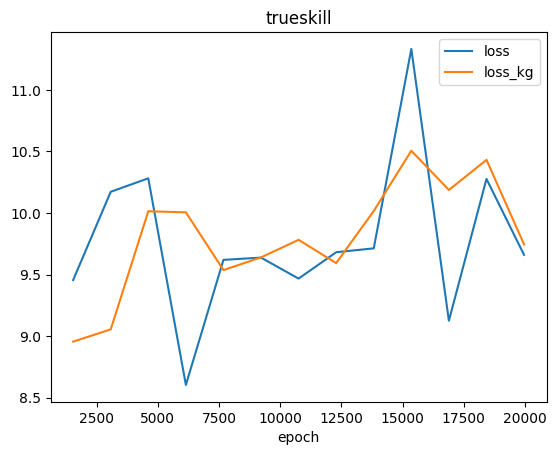

In [69]:
draw_loss("____", "__kg1__")

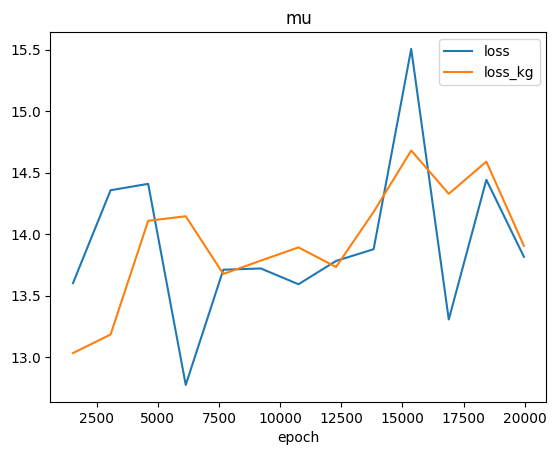

In [71]:
draw_loss("____", "__kg1__", "mu")

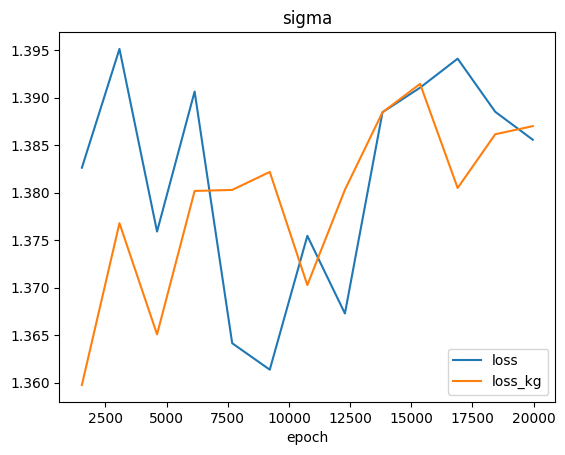

In [70]:
draw_loss("____", "__kg1__", "sigma")

<AxesSubplot:title={'center':'KG walk depth comparison'}, xlabel='epoch'>

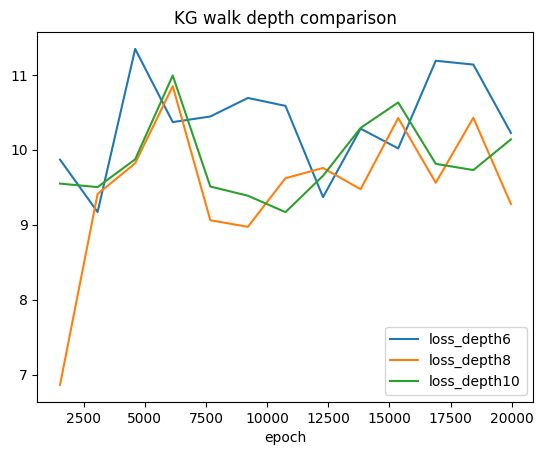

In [78]:
loss_kg_depth6 = get_loss(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__2__1714500083")
loss_kg_depth8 = get_loss(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__3__1714509300")
loss_kg_depth10 = get_loss(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__3__1714504901")
pd.merge(pd.merge(loss_kg_depth6, loss_kg_depth8, on="epoch", suffixes=("_depth6", "_depth8")), loss_kg_depth10, on="epoch").rename(columns={"loss": "loss_depth10"}).plot(x="epoch", y=["loss_depth6", "loss_depth8", "loss_depth10"], title="KG walk depth comparison")

<AxesSubplot:title={'center':'long KG training'}, xlabel='epoch'>

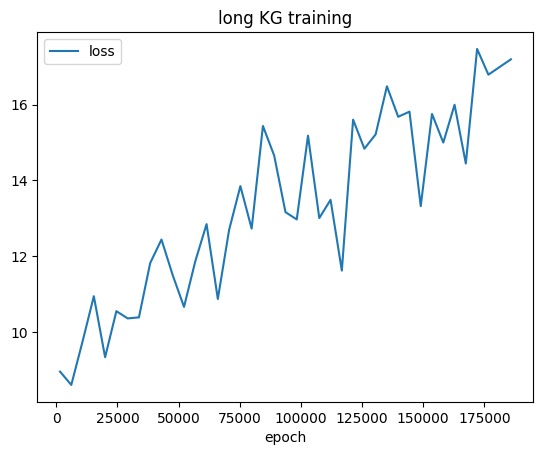

In [82]:
get_loss(r"MicroRTSGridModeVecEnv__ppo_gridnet__prior__kg1__1__1714407943").plot(x="epoch", y="loss", title="long KG training")